# MNIST (Modified National Institute of Standards and Technology database)

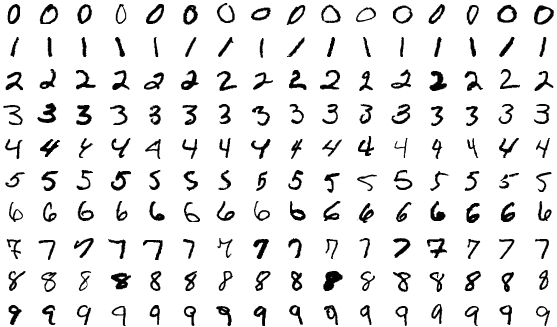

## Dependências

In [17]:
import tensorflow as tf
import PIL
import numpy as np

## Utils

In [18]:
def load_normalize(filename):

  image = PIL.Image.open(filename)
  image = image.convert("L")
  image = image.resize((28,28))

  # Normalize image to [0, 1]
  image = np.array(image, np.float32)/ 255.0
  image = image.reshape(1,28,28)

  return image

def denormalize(image):
  return (image.reshape(28,28)*255).astype(np.uint8)

## Dataset and Normalization

In [19]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)  # Adiciona a dimensão de canal
train_images = train_images.astype('float32')  # Converte os valores para float
train_images /= 255  # Normaliza os valores

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images = test_images.astype('float32')
test_images /= 255

print(f"Total Training: {len(train_images)}")
print(f"Total Testing: {len(test_images)}")

Total Training: 60000
Total Testing: 10000


In [20]:
i = 0
print(train_labels[i])
print(train_images[i].shape)

PIL.Image.fromarray(denormalize(train_images[i]))

5
(28, 28, 1)


## Model Architecture

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 4)         40        
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 8)         296       
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 16)                73744     
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 74250 (290.04 KB)
Trainable params: 74250 (290.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

In [22]:
model.fit(train_images, train_labels, epochs=10)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('Loss:', test_loss)
print('Accuracy:', test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2637 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0987 - accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0727 - accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0576 - accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0463 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0390 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0330 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0274 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0235 - accuracy: 0.9923
Epoch 10/10
313/313 [==============================] - 2s 6ms/st

## Tests

In [23]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

test_data = load_normalize("5.png")

print(test_data.shape)

predictions = model.predict(test_data)
print("Previsões:")
print(predictions)
print()
index = predictions.argmax()
print(class_names[index])
print(predictions[0][index])

(1, 28, 28)
1/1 [==============================] - 0s 68ms/step
Previsões:
[[4.97837682e-09 7.26614271e-14 1.55164805e-08 7.66327896e-04
  1.34512409e-22 9.99233723e-01 2.30876448e-14 6.88739560e-12
  1.46015955e-08 4.66238326e-10]]

5
0.9992337


## Perguntas

Por que o treinamento demorou tanto?